<a href="https://colab.research.google.com/github/Siba-mangal/Brain_tumor_detection/blob/main/brain_tumor_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
from os import listdir
from tensorflow.keras import datasets
import os


%matplotlib inline

In [5]:
def load_data(dir_list, image_size):
# load all images in a directory
    X = []
    y = []
    image_width, image_height = image_size
    
    for directory in dir_list:
        for filename in listdir(directory):
            # load the image
            image = cv2.imread(directory + '/' + filename)
            image = cv2.resize(image, dsize=(image_width, image_height), interpolation=cv2.INTER_CUBIC)
            # normalize values
            image = image.astype('float32')
            image = image / 255.0
            X.append(image)
            if directory[-3:] == 'yes':
                y.append([1])
            else:
                y.append([0])
                
    X = np.array(X)
    y = np.array(y)
    
    # Shuffle the data
    X, y = shuffle(X, y)
    
    print(f'Number of examples is: {len(X)}')
    print(f'X shape is: {X.shape}')
    print(f'y shape is: {y.shape}')

    return X, y

In [6]:
path = '/content/drive/MyDrive/dataset'
yes = path + '/yes' 
no = path + '/no'

IMG_WIDTH, IMG_HEIGHT = (256, 256)

X, y = load_data([yes, no], (IMG_WIDTH, IMG_HEIGHT))

Number of examples is: 1464
X shape is: (1464, 256, 256, 3)
y shape is: (1464, 1)


In [7]:
def split_data(X, y, test_size=0.2):
       
    X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.20,random_state = 42)
    X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.20)
    
    return X_train, y_train, X_val, y_val, X_test, y_test

In [8]:
X_train, y_train, X_val, y_val, X_test, y_test = split_data(X, y, test_size=0.20)

In [9]:
X_train.shape, y_train.shape ,X_val.shape, y_val.shape, X_test.shape, y_test.shape 

((1171, 256, 256, 3),
 (1171, 1),
 (59, 256, 256, 3),
 (59, 1),
 (234, 256, 256, 3),
 (234, 1))

In [14]:
#build model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout,ZeroPadding2D
from tensorflow.keras.utils import to_categorical
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)
from dataclasses import dataclass

In [62]:
input_shape = (256,256,3)
model = Sequential()
model.add(ZeroPadding2D(padding=(2, 2), input_shape=input_shape))
model.add(Conv2D(filters = 32,kernel_size = (3,3),strides=(1,1),padding="same",activation = 'relu', input_shape = (256,256,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),strides=(1,1),activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),strides=(1,1),activation = 'relu'))
model.add(Dropout(0.20))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='sigmoid'))

In [63]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_11 (ZeroPadd  (None, 260, 260, 3)      0         
 ing2D)                                                          
                                                                 
 conv2d_30 (Conv2D)          (None, 260, 260, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 130, 130, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                            
                                                     

In [64]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [65]:
history = model.fit(x=X_train, y=y_train, batch_size=32, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
37/37 [==============================] - 6s 120ms/step - loss: 0.8596 - accuracy: 0.7284 - val_loss: 0.6643 - val_accuracy: 0.7458
Epoch 2/20
37/37 [==============================] - 4s 106ms/step - loss: 0.3274 - accuracy: 0.8625 - val_loss: 0.3727 - val_accuracy: 0.7966
Epoch 3/20
37/37 [==============================] - 4s 105ms/step - loss: 0.2019 - accuracy: 0.9189 - val_loss: 0.1013 - val_accuracy: 0.9831
Epoch 4/20
37/37 [==============================] - 4s 110ms/step - loss: 0.0795 - accuracy: 0.9752 - val_loss: 0.0727 - val_accuracy: 0.9661
Epoch 5/20
37/37 [==============================] - 4s 109ms/step - loss: 0.0338 - accuracy: 0.9906 - val_loss: 0.0397 - val_accuracy: 0.9831
Epoch 6/20
37/37 [==============================] - 4s 107ms/step - loss: 0.0243 - accuracy: 0.9932 - val_loss: 0.1294 - val_accuracy: 0.9322
Epoch 7/20
37/37 [==============================] - 4s 108ms/step - loss: 0.0131 - accuracy: 0.9974 - val_loss: 0.0644 - val_accuracy: 0.9831
Epoch 

In [66]:
history = model.history.history
for key in history.keys():
    print(key)

loss
accuracy
val_loss
val_accuracy


In [67]:
def plot_metrics(history):
    
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']
    
    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()
    
    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()

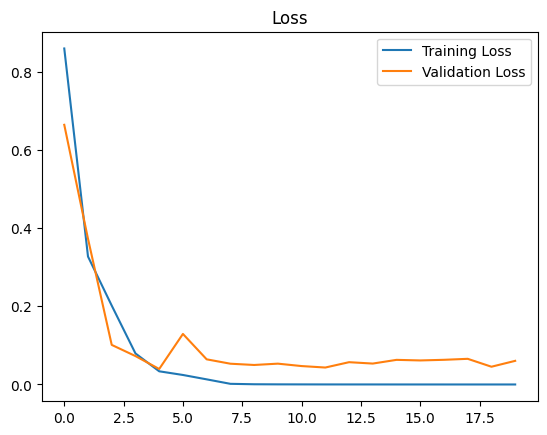

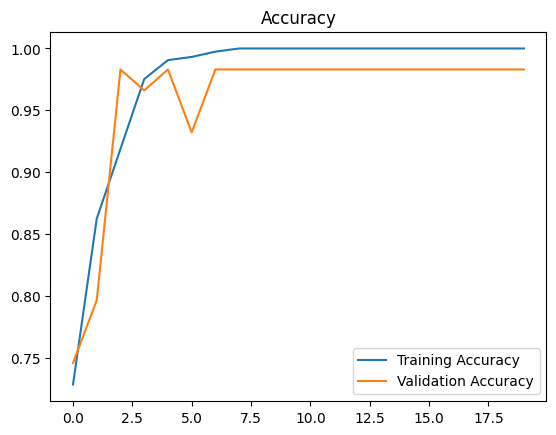

In [68]:
plot_metrics(history)

In [69]:
loss, acc = model.evaluate(x=X_test, y=y_test)

8/8 [==============================] - 0s 39ms/step - loss: 0.3544 - accuracy: 0.9530


In [70]:
y_test_prob = model.predict(X_test)

8/8 [==============================] - 0s 29ms/step


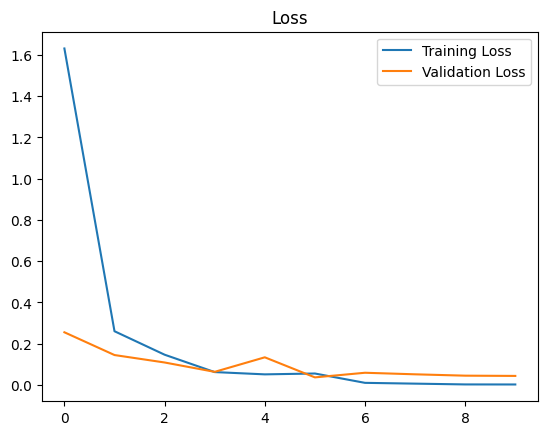

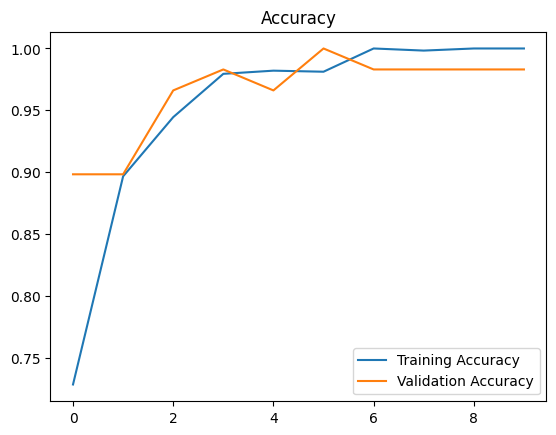

In [49]:
plot_metrics(history)# 64 last layer

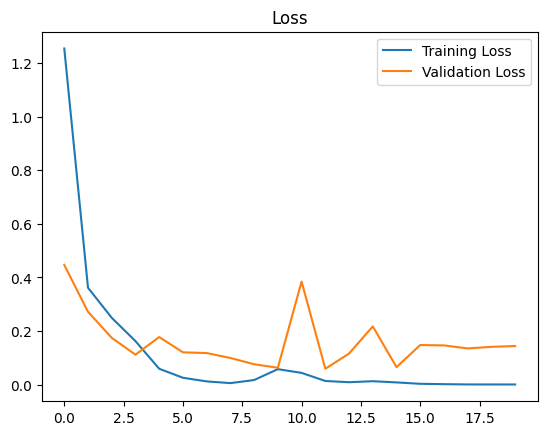

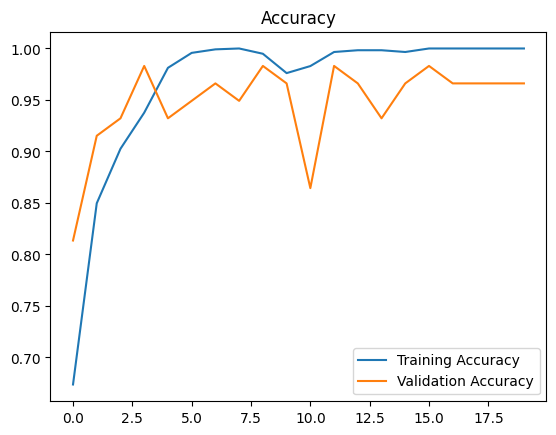

In [ ]:
plot_metrics(history)

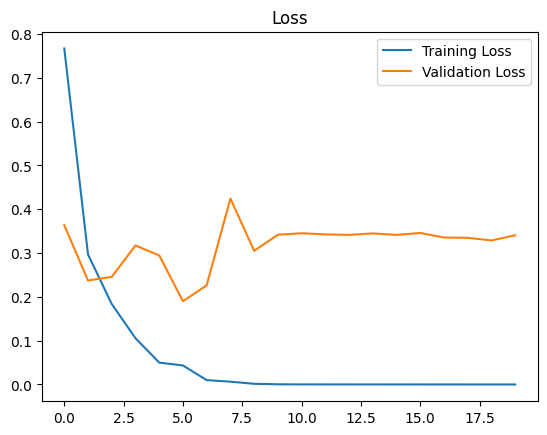

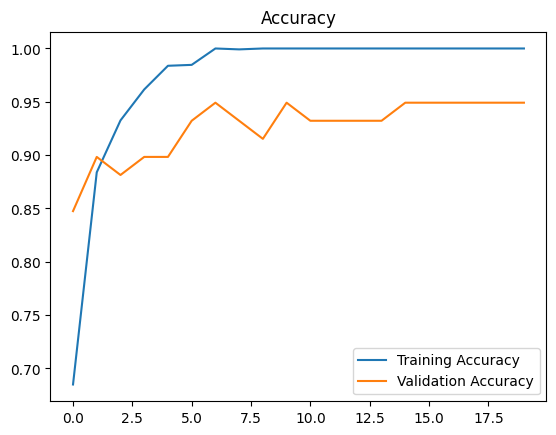

In [ ]:
#1st iteration over fetting
plot_metrics(history)

In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test,verbose=2)
print(test_acc)
print(test_loss)